## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [2]:
pip install yfinance

In [20]:
# Get the data for Mahindra and Mahindra
ticker = "M&M.NS"

# Download the data
data = yf.download(ticker, start="2021-07-22", end="2024-07-22")

[*********************100%%**********************]  1 of 1 completed


In [21]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-22,764.200012,767.099976,755.650024,758.450012,729.951355,2182264
2021-07-23,758.500000,767.849976,758.250000,764.200012,735.485229,1179241
2021-07-26,763.000000,764.099976,752.500000,754.299988,725.957153,1187498
2021-07-27,756.000000,760.000000,742.650024,745.549988,717.535950,1732564
2021-07-28,750.700012,750.700012,724.650024,728.700012,701.319153,4016758


## 2. Select the Target Variable and Clean the data

In [22]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

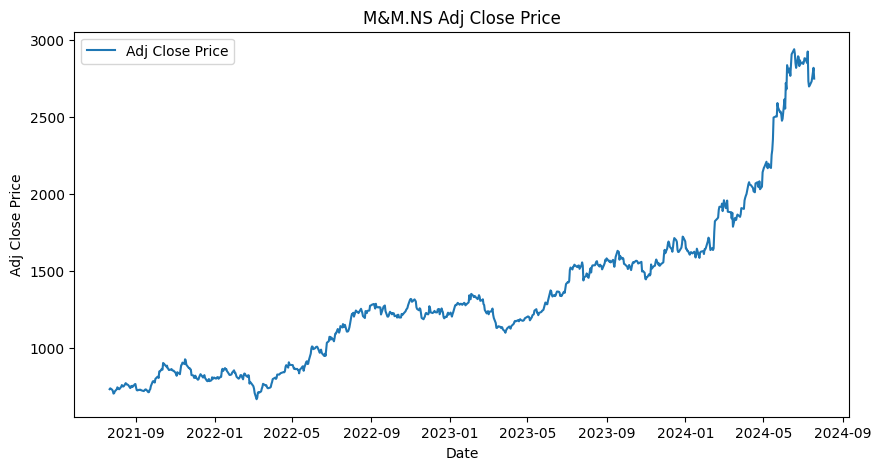

In [23]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('M&M.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
df.columns

Index(['Adj Close'], dtype='object')

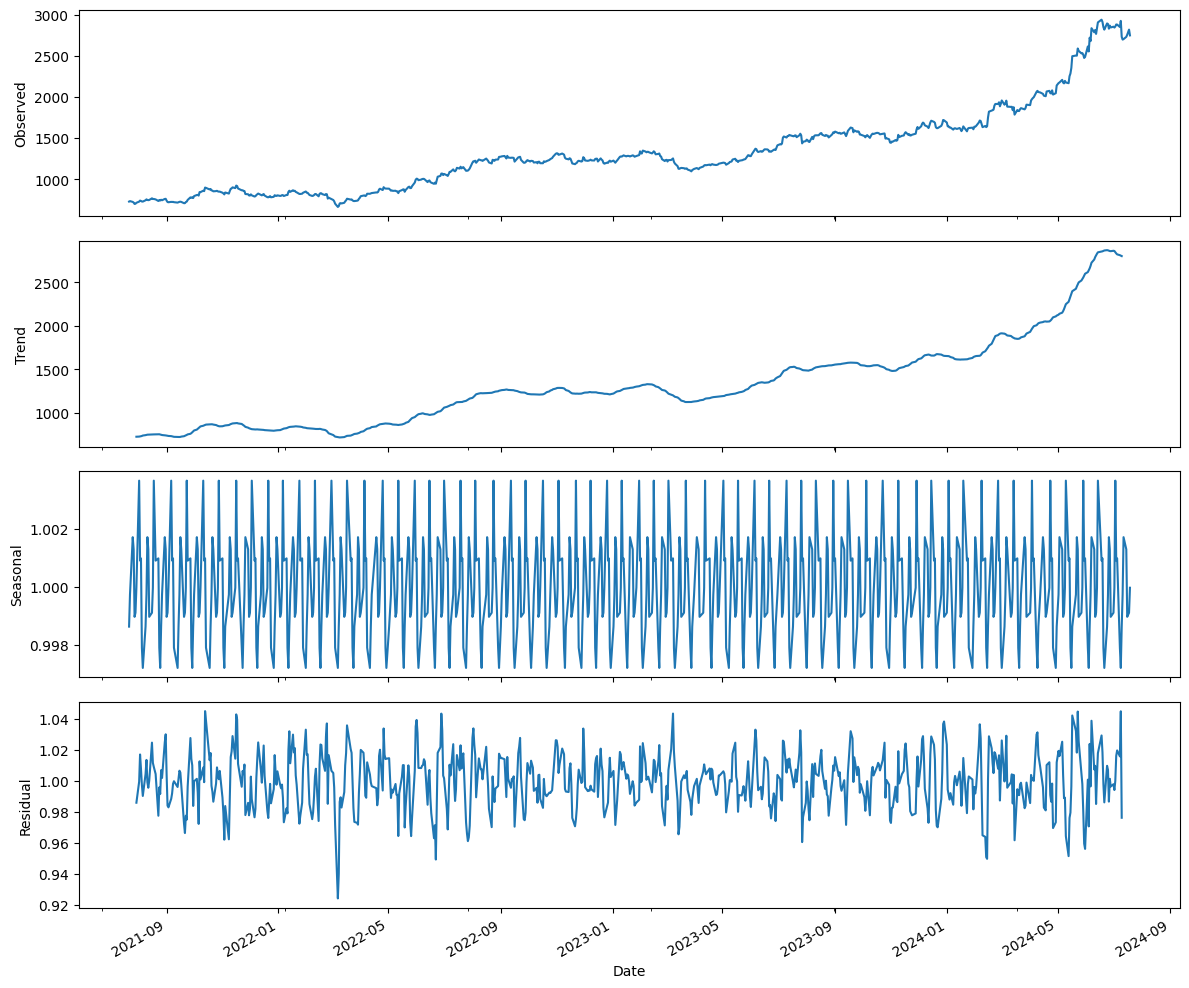

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [27]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [28]:
monthly_data = df.resample("M").mean()

In [29]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [30]:
len(monthly_data), len(train_data)

(37, 29)

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

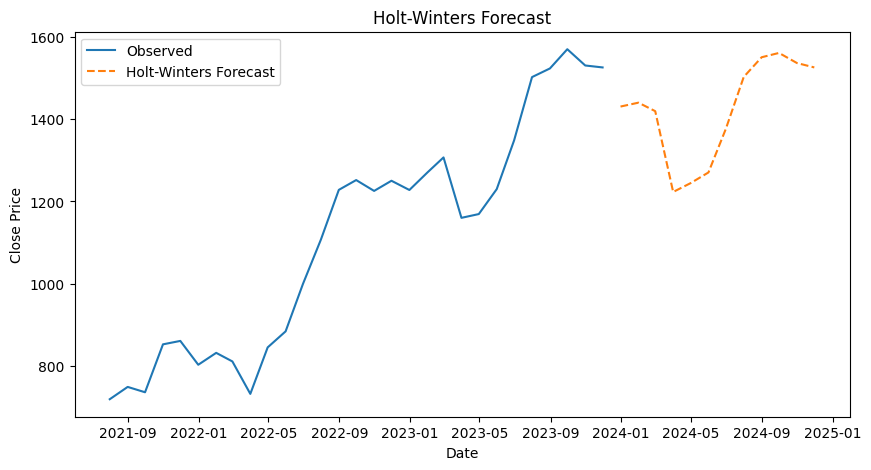

In [32]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [33]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [34]:
len(test_data), len(y_pred)

(8, 8)

In [35]:
y_pred, test_data

(2023-12-31    1431.107514
 2024-01-31    1440.549489
 2024-02-29    1419.871670
 2024-03-31    1223.135087
 2024-04-30    1244.543043
 2024-05-31    1270.645402
 2024-06-30    1376.486328
 2024-07-31    1503.187576
 Freq: M, dtype: float64,
               Adj Close
 Date                   
 2023-12-31  1665.480237
 2024-01-31  1622.760905
 2024-02-29  1771.687145
 2024-03-31  1874.615614
 2024-04-30  2033.798376
 2024-05-31  2358.603934
 2024-06-30  2809.183607
 2024-07-31  2806.142875)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 879.8596715121002
MAE: 754.0933230637547
MAPE: nan
R-squared: -2.7638263449020535


In [37]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [38]:
holt_winters_forecast

2023-12-31    1431.107514
2024-01-31    1440.549489
2024-02-29    1419.871670
2024-03-31    1223.135087
2024-04-30    1244.543043
2024-05-31    1270.645402
2024-06-30    1376.486328
2024-07-31    1503.187576
2024-08-31    1551.166220
2024-09-30    1561.652381
2024-10-31    1537.053009
2024-11-30    1526.358880
2024-12-31    1431.107514
2025-01-31    1440.549489
2025-02-28    1419.871670
2025-03-31    1223.135087
2025-04-30    1244.543043
2025-05-31    1270.645402
2025-06-30    1376.486328
2025-07-31    1503.187576
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [39]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [47]:
from pmdarima import auto_arima

In [115]:
# Clean the data
adj_close_series = train_data['Adj Close'].dropna()

# Fit auto_arima model
arima_model = auto_arima(monthly_data['Adj Close'],
                         seasonal=True,
                         m=7,  # Weekly seasonality
                         stepwise=True,
                         suppress_warnings=True)

In [116]:
# Print the model summary
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   37
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 7)   Log Likelihood                -215.845
Date:                             Mon, 22 Jul 2024   AIC                            439.690
Time:                                     08:06:49   BIC                            446.024
Sample:                                 07-31-2021   HQIC                           441.901
                                      - 07-31-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.6534     14.387      2.409      0.016       6.455      62.852
ar.L1          0.3103      

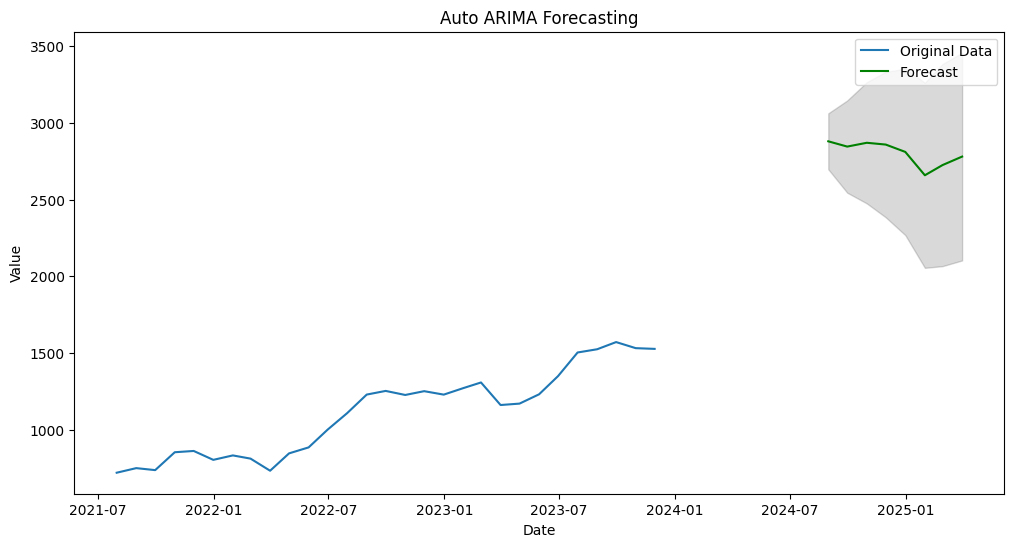

In [117]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

len(forecast)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 855.2381470111056
MAE: 713.5571349900163
MAPE: nan
R-squared: -2.556123876940412


### 3.3 ARIMA Daily Data

In [64]:
daily_data= df.copy()

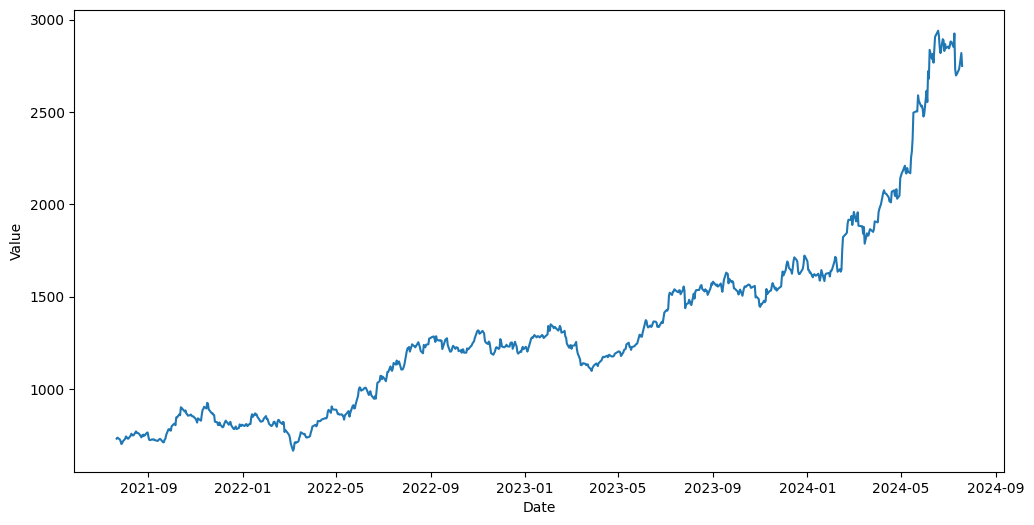

In [65]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [75]:
# Clean the data
adj_close_series = train_data['Adj Close'].dropna()

# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'],
                         seasonal=True,
                         m=7,  # Weekly seasonality
                         stepwise=True,
                         suppress_warnings=True)

In [76]:
# Print the model summary
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  739
Model:             SARIMAX(1, 2, 2)x(1, 0, [], 7)   Log Likelihood               -3453.205
Date:                            Mon, 22 Jul 2024   AIC                           6916.411
Time:                                    07:54:55   BIC                           6939.424
Sample:                                         0   HQIC                          6925.285
                                            - 739                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7995      0.114     -7.005      0.000      -1.023      -0.576
ma.L1         -0.2516      0.124   

In [77]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [78]:
fitted_values

Date
2021-07-22       0.000000
2021-07-23    1094.894451
2021-07-26     741.613977
2021-07-27     725.092484
2021-07-28     712.992087
                 ...     
2024-07-12    2694.685056
2024-07-15    2716.387432
2024-07-16    2731.937236
2024-07-18    2770.204170
2024-07-19    2816.105654
Name: predicted_mean, Length: 739, dtype: float64

In [79]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [80]:
len(forecast)

60

In [82]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

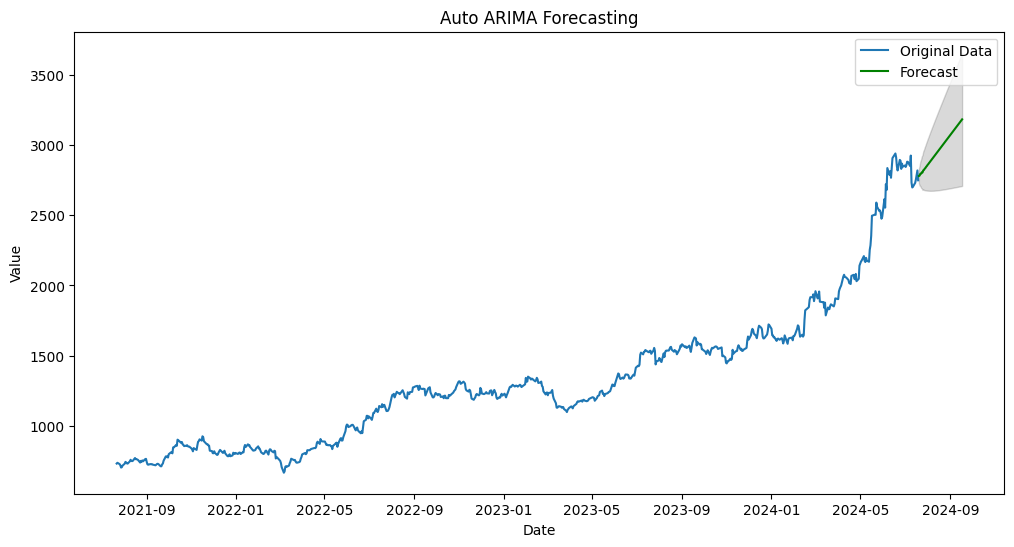

In [83]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates,
                 conf_int_df['lower_bound'],
                 conf_int_df['upper_bound'],
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [90]:
# pip install tensorflow

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [92]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-22,764.200012,767.099976,755.650024,758.450012,729.951355,2182264
2021-07-23,758.500000,767.849976,758.250000,764.200012,735.485229,1179241
2021-07-26,763.000000,764.099976,752.500000,754.299988,725.957153,1187498
2021-07-27,756.000000,760.000000,742.650024,745.549988,717.535950,1732564
2021-07-28,750.700012,750.700012,724.650024,728.700012,701.319153,4016758


In [93]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [94]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (709, 30, 6)
Shape of y: (709,)


In [95]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31651 (123.64 KB)
Trainable params: 31651 (123.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 [==============================] - 7s 108ms/step - loss: 0.0046 - val_loss: 0.0303
Epoch 2/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0109 - val_loss: 0.0076
Epoch 3/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0068 - val_loss: 0.0285
Epoch 4/20
18/18 [==============================] - 1s 36ms/step - loss: 0.0030 - val_loss: 0.0211
Epoch 5/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0014 - val_loss: 0.0072
Epoch 6/20
18/18 [==============================] - 1s 33ms/step - loss: 0.0012 - val_loss: 0.0095
Epoch 7/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0011 - val_loss: 0.0079
Epoch 8/20
18/18 [==============================] - 1s 35ms/step - loss: 0.0011 - val_loss: 0.0076
Epoch 9/20
18/18 [==============================] - 1s 35ms/step - loss: 9.9793e-04 - val_loss: 0.0060
Epoch 10/20
18/18 [==============================] - 1s 35ms/step - loss: 9.2025e-04 - val_loss: 0.0051


In [98]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 [==============================] - 1s 16ms/step


In [99]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 1688.932157522897, True Value: 1686.9976806640625
Prediction: 1695.71718708142, True Value: 1634.978515625
Prediction: 1699.6033866883154, True Value: 1621.9737548828123
Prediction: 1698.5476512813984, True Value: 1622.370849609375
Prediction: 1694.4572361207174, True Value: 1650.1673583984375
Prediction: 1689.5089257292711, True Value: 1675.6805419921875
Prediction: 1686.709795832132, True Value: 1721.842529296875
Prediction: 1688.87111667321, True Value: 1716.8292236328125
Prediction: 1694.553951955888, True Value: 1690.9190673828125
Prediction: 1699.9030972602777, True Value: 1644.1612548828125


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 84.34665092156955
MAE: 67.74926550046285
MAPE: 3.119473985717228
R-squared: 0.96468310190164


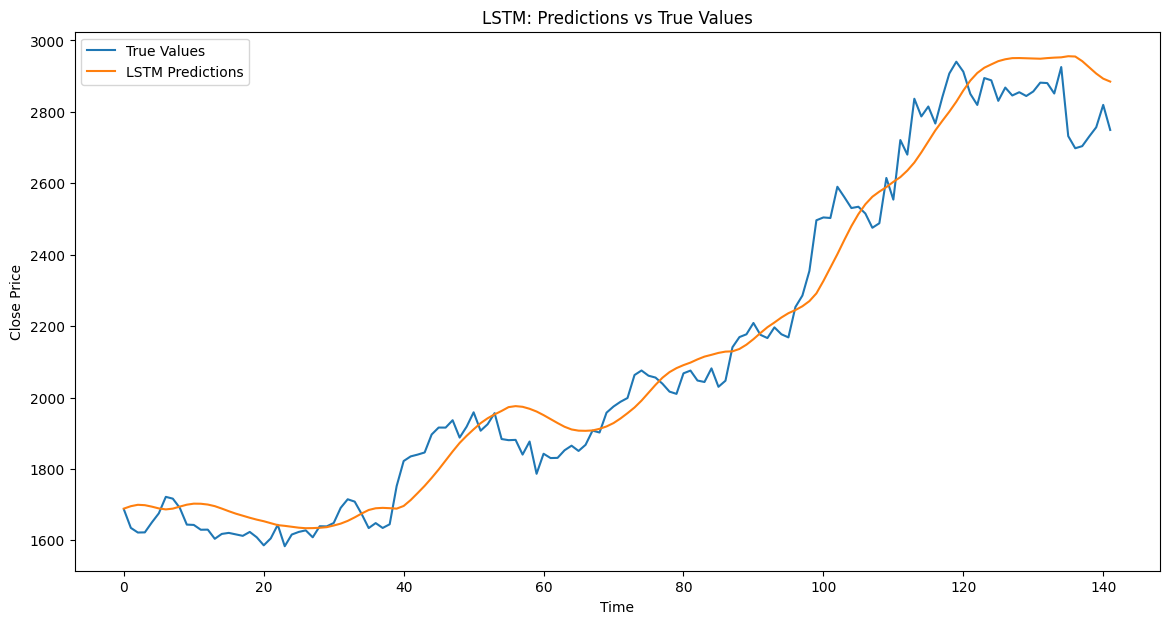

In [101]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [104]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.

    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]

    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [105]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [106]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0002638180129115932


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.016242475578297576
MAE: 0.011134221432902007
MAPE: 1724347.8663442947
R-squared: 0.9946825460469275


In [108]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.00012677475905790097


In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.011259429783870095
MAE: 0.008408827298463857
MAPE: 1668343.6959188734
R-squared: 0.9974447577090646


In [110]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.25768035234502434, True Value: 0.257851300401382
Prediction: 0.25278862034137045, True Value: 0.26210220516019606
Prediction: 0.5675988261602556, True Value: 0.5497793016071908
Prediction: 0.29034199802715105, True Value: 0.2942083635277199
Prediction: 0.2662036175333596, True Value: 0.27214211807162875
Prediction: 0.08191600748588351, True Value: 0.08817492164657253
Prediction: 0.3956198248251765, True Value: 0.39097408208617784
Prediction: 0.07261215817764116, True Value: 0.06299116723676174
Prediction: 0.08914758765848368, True Value: 0.08570100235529626
Prediction: 0.23589174326788104, True Value: 0.22542459431349632


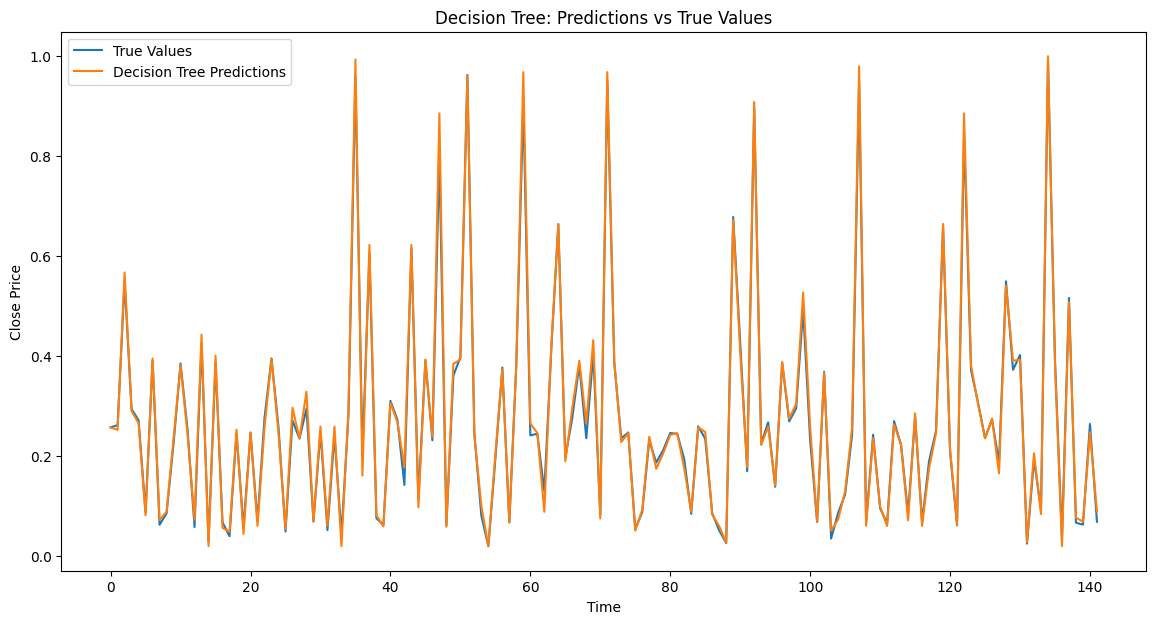

In [111]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [112]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.26440645783504785, True Value: 0.257851300401382
Prediction: 0.2589432701338675, True Value: 0.26210220516019606
Prediction: 0.5406521005906209, True Value: 0.5497793016071908
Prediction: 0.295832749828489, True Value: 0.2942083635277199
Prediction: 0.26933325752329684, True Value: 0.27214211807162875
Prediction: 0.09077471733494821, True Value: 0.08817492164657253
Prediction: 0.39372859112947467, True Value: 0.39097408208617784
Prediction: 0.062108787759969024, True Value: 0.06299116723676174
Prediction: 0.10162657585196444, True Value: 0.08570100235529626
Prediction: 0.23748786601362748, True Value: 0.22542459431349632


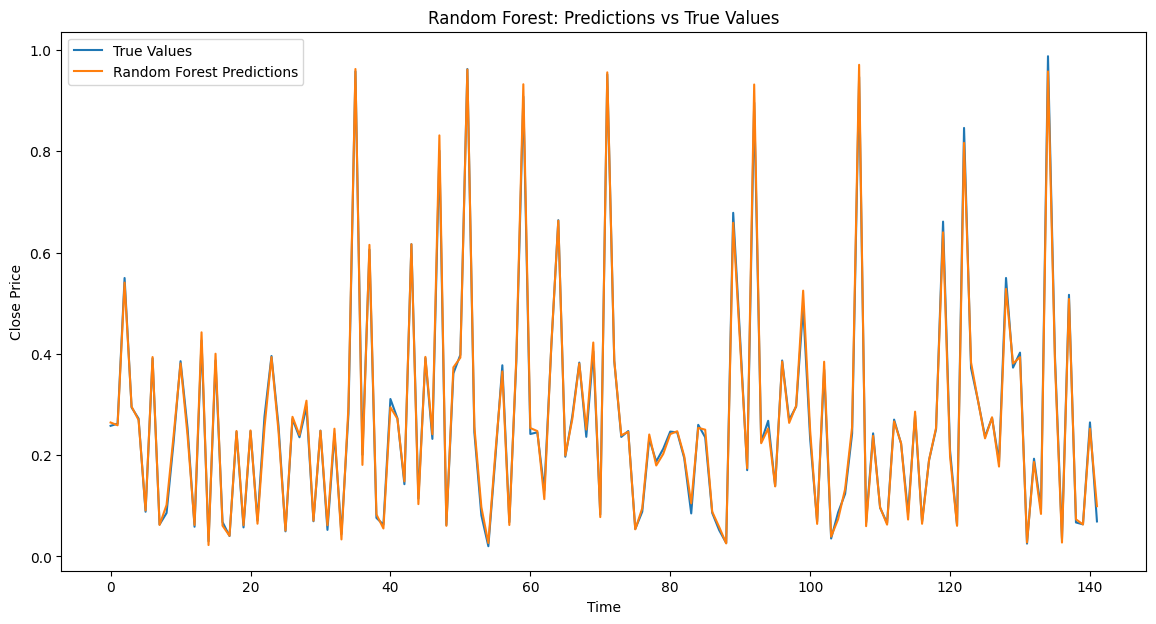

In [113]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

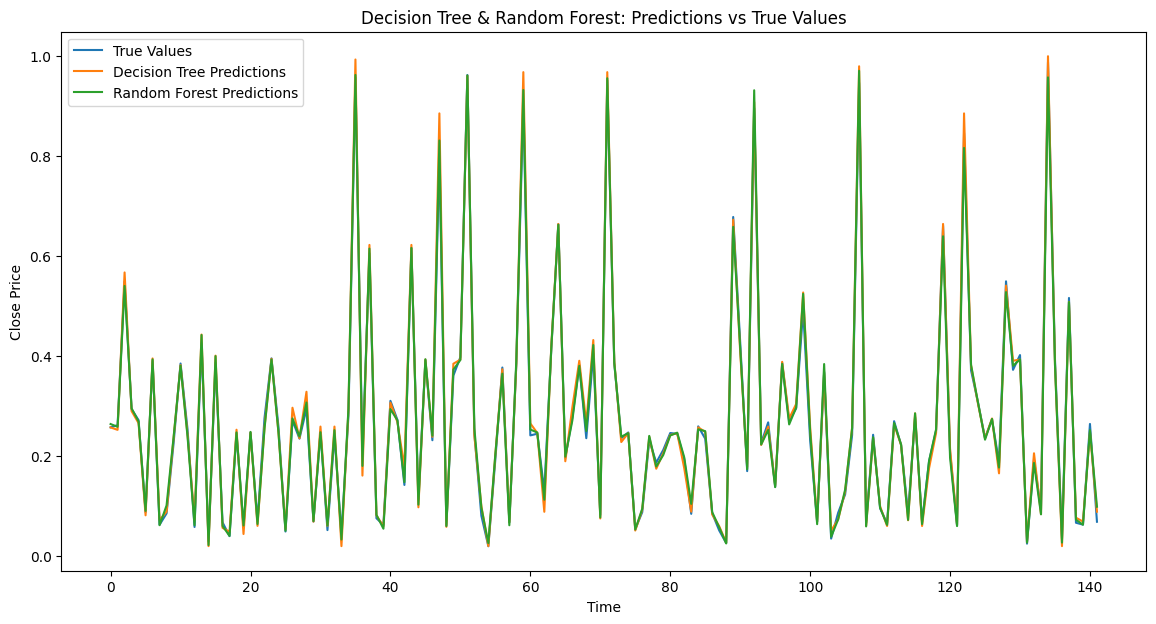

In [114]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()